<a href="https://colab.research.google.com/github/YS2226/YS2226.github.io/blob/main/401_NN%2C_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワークのクラス分類をしてみよう

## 学習に使用するデータを整理しよう

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv',
                   header = None,
                   usecols = [6,7,8,9,10,11,12,13,14,15,16,17,18], #6-18番目の列のデータだけ必要なためいらないデータを省く
                   encoding = 'UTF-8')

df.head()

,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 利用するセルのみ指定して読み込み


## ラベルの文字列を数字に置き換え

In [5]:
#ラベルの数字化
#map:   pandas の関数　辞書型で文字を数字に変えれる。
df[18] = df[18].map({'sitting':0, 'standing':1, 'standup':2, 'sitdown':3, 'walking':4})
df

,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,0
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,0
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,0
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,0
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165625,-6,96,-142,-2,91,-103,14,121,-102,-194,-78,-156,4
165626,-13,94,-150,-13,88,-98,16,120,-99,-194,-79,-157,4
165627,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,4
165628,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,4


## 学習データとラベルデータに分割

In [6]:
#pandas のiloc という機能を使う

#データの１－５番目は排除したので最後の列は１２列目
train = df.iloc[:, :12]
label = df.iloc[:, 12]

train

,6,7,8,9,10,11,12,13,14,15,16,17
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143
...,...,...,...,...,...,...,...,...,...,...,...,...
165625,-6,96,-142,-2,91,-103,14,121,-102,-194,-78,-156
165626,-13,94,-150,-13,88,-98,16,120,-99,-194,-79,-157
165627,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160
165628,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158


## Numpy形式に変更

In [7]:
train = train.values
label = label.values


## 学習データとテストデータに分割

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(train, label, train_size = 0.8,
                                                                  random_state = 0) #シード値のようなもの

len(train_data), len(test_data)


(132504, 33126)

## ニューラルネットワークを定義

In [11]:
'''
google colabでは下記は必要ないがほかのプラットフォームでは必要かも

import tensorflow as tf
from tensorfkiw import keras
'''
from tensorflow.keras import models, layers

#モデルのインスタンス化
model = models.Sequential()

model.add(layers.Dense(10,activation="relu", input_shape=(12,)))
#層を増やすにはこの行を増やしていく
#model.add(layers.Dense(10,activation="relu"))
#model.add(layers.Dense(10,activation="relu"))
model.add(layers.Dense(5,activation='softmax'))

## 最適化アルゴリズム、損失関数、評価関数を定義

In [12]:
#モデルのコンパイル
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 学習を実行

In [13]:
'''
epoch：学習回数
バッチ：Wを求める頻度　つまり５０００の場合は、５０００データが入ったらWを一回計算 （ミニバッチ数という）
verbose: 一回
'''
history = model.fit(train_data,train_label, batch_size=500,epochs=50,verbose=2,validation_data=(test_data,test_label))

Epoch 1/50
266/266 - 2s - loss: 18.0337 - accuracy: 0.4578 - val_loss: 3.0405 - val_accuracy: 0.6252 - 2s/epoch - 8ms/step
Epoch 2/50
266/266 - 1s - loss: 1.8572 - accuracy: 0.7063 - val_loss: 1.2624 - val_accuracy: 0.7474 - 1s/epoch - 5ms/step
Epoch 3/50
266/266 - 1s - loss: 1.0445 - accuracy: 0.7697 - val_loss: 0.9179 - val_accuracy: 0.7814 - 1s/epoch - 4ms/step
Epoch 4/50
266/266 - 1s - loss: 0.8346 - accuracy: 0.7841 - val_loss: 0.8775 - val_accuracy: 0.7815 - 1s/epoch - 4ms/step
Epoch 5/50
266/266 - 1s - loss: 0.7512 - accuracy: 0.7885 - val_loss: 0.6951 - val_accuracy: 0.7902 - 662ms/epoch - 2ms/step
Epoch 6/50
266/266 - 1s - loss: 0.6520 - accuracy: 0.8043 - val_loss: 0.6121 - val_accuracy: 0.8159 - 581ms/epoch - 2ms/step
Epoch 7/50
266/266 - 1s - loss: 0.5886 - accuracy: 0.8163 - val_loss: 0.5730 - val_accuracy: 0.8251 - 655ms/epoch - 2ms/step
Epoch 8/50
266/266 - 1s - loss: 0.5538 - accuracy: 0.8229 - val_loss: 0.5289 - val_accuracy: 0.8358 - 569ms/epoch - 2ms/step
Epoch 9/50


## 結果を表形式に保存

In [14]:
result = pd.DataFrame(history.history)
result

,loss,accuracy,val_loss,val_accuracy
0,18.033735,0.457813,3.040466,0.625189
1,1.857244,0.706341,1.262407,0.747419
2,1.044508,0.769728,0.917892,0.781410
3,0.834567,0.784150,0.877511,0.781501
4,0.751247,0.788550,0.695056,0.790195
5,0.652016,0.804330,0.612054,0.815855
6,0.588573,0.816338,0.573050,0.825062
7,0.553830,0.822881,0.528874,0.835839
8,0.517469,0.831424,0.499858,0.830315
9,0.496739,0.834820,0.480884,0.842963


## グラフ描画

<Axes: >

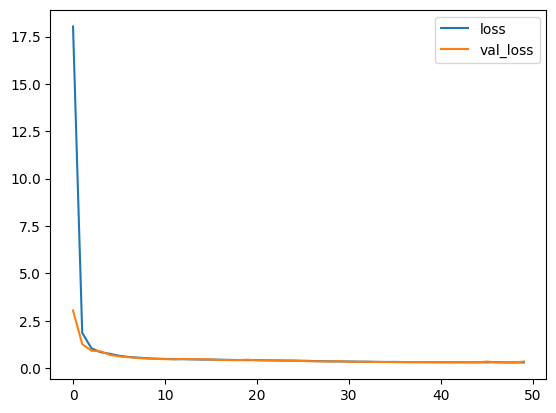

In [15]:
result[['loss','val_loss']].plot()